## Analysis

 - Displayed in both scatter plots, the is a correlation between weight and tumor size. The more the mouse weighed the larger the average volume of the tumor was.Ideally, this may mean that the weight of the mouse may deteermine the effectiveness of the drug being studied.
 - According to the summary statistics table, Capomulin and Ramicane seemed to be the most effective drug when treating the tumors. The mean, median, and variance associated with the two drugs are the lowest compared to the others. We may also be able to conclude that both Ketapril and Naftisol are the least effective with their results being the highest.
 - Based on the data displayed in our line plot, it can be said the the longer mouse U364 was being treated with Capomulin the more effective it was at reducing the size of the tumor. There was a significant decrease in the size of the tumor between 15 and 25 days with another decrease at 40 days. 

In [1]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# csv files  to read
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combined data of both csv files
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# count the mice
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [3]:
# retrieving the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# optional: get all the data for the duplicate Mouse ID
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# create a clean dataframe by getting rid of the duplicate mouse by its ID
clean_mouse_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice) == False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# count number of mice in the clean dataframe
clean_mouse = clean_mouse_df["Mouse ID"].nunique()
clean_mouse

248

## Summary Statistics

In [7]:
# statistics table using mean, median, variance, standard deviation, and SEM of the tumor
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

# new dataframe with results
summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                          "Median Tumor Volume":median,
                          "Tumor Volume Variance":var,
                          "Tumor Volume Std. Dev.":std,
                          "Tumor Volume Std. Err.":sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# summary statistics in a single line
clean_summary = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
clean_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Mice Observed')

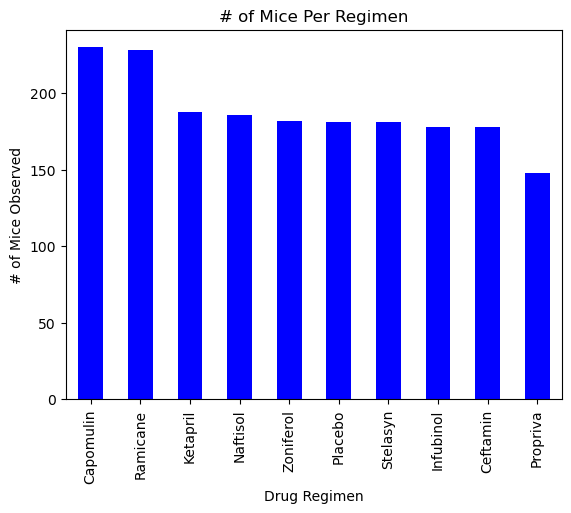

In [9]:
# bar plot showing the total number of rows for each drug regimen using Pandas
mice_per_drug = clean_mouse_df["Drug Regimen"].value_counts()

plot_pandas = mice_per_drug.plot.bar(color='b')
plt.title("# of Mice Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Observed")


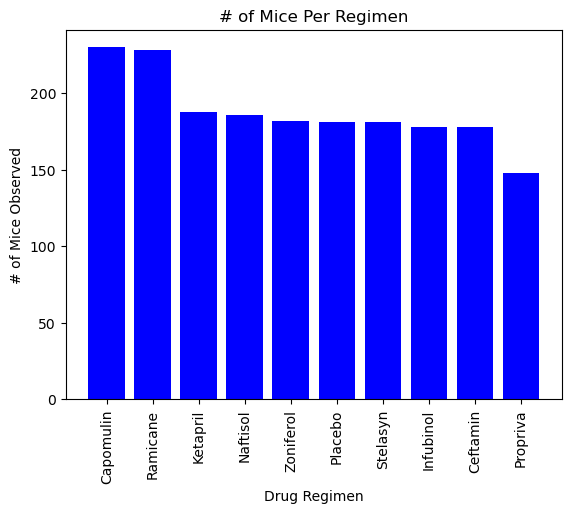

In [10]:
# bar plot showing the total number of rows for each drug refimen using pyplot
x_axis = mice_per_drug.index.values
y_axis = mice_per_drug.values

plt.bar(x_axis, y_axis, align='center', color='b', alpha=1.0)
plt.title("# of Mice Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Observed")
plt.xticks(rotation="vertical")
plt.show()

Text(0.5, 1.0, 'Male Vs. Female')

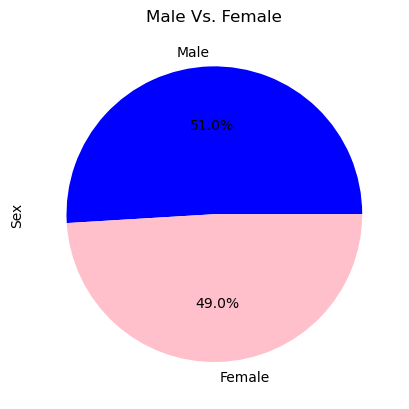

In [12]:
# pie plot showing the distribution of female versus male mice using pyplot
# define colors of pie chart
color = ['blue', 'pink']

# mice gender
male_female_mice = clean_mouse_df["Sex"].value_counts()
male_female_mice.plot(kind='pie', y='Sex', colors=color, autopct="%1.1f%%")
plt.title('Male Vs. Female')

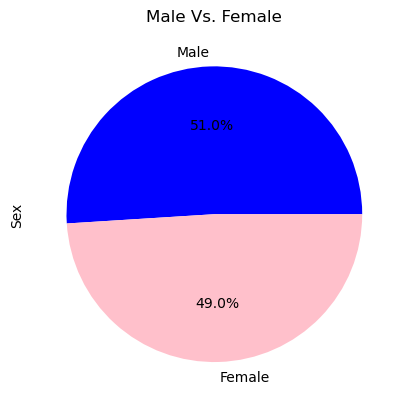

In [13]:
# create a pie showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [51.0, 49.0]
colors = ["blue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Male Vs. Female")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# final tumor volume of each mouse across four of the most promising treatment regimens
# regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin_data = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
ramican_data = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramican"]
infubinol_data = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol"]
ceftamin_data = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin"]
# the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint_df.reset_index()
# merged dataframe to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(greatest_timepoint_df, clean_mouse_df, how="inner",
                                        on=["Mouse ID", "Timepoint"])
last_timepoint_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [24]:
# for loop
treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# empty list to fill with tumor vol data(for plotting)
tumor_volume = []
tumor_volume


# loop through each drug in the treatment_regimen finding lower and upper quartiles, and lower and upper bounds
for treatment in treatment_regimen:
    tumor_volume_x = last_timepoint_df[["Drug Regimen","Tumor Volume (mm3)"]].loc[last_timepoint_df['Drug Regimen'] == treatment]
    tumor_append = tumor_volume_x[['Drug Regimen', 'Tumor Volume (mm3)']]
    tumor_volume.append(tumor_append)
    lowerq = np.quantile(tumor_volume_x['Tumor Volume (mm3)'], 0.25)
    upperq = np.quantile(tumor_volume_x['Tumor Volume (mm3)'], 0.75)
    iqr = upperq-lowerq
    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)
    
    #print statements
    print(f"The lower quartile for {treatment} is {lowerq}.")
    print(f"The upper quartile for {treatment} is {upperq}.")
    print(f"The IQR for {treatment} is {iqr}.")
    
    
   
    

The lower quartile for Capomulin is 32.37735684.
The upper quartile for Capomulin is 40.1592203.
The IQR for Capomulin is 7.781863460000004.
The lower quartile for Ramicane is 31.56046955.
The upper quartile for Ramicane is 40.65900627.
The IQR for Ramicane is 9.098536719999998.
The lower quartile for Infubinol is 54.04860769.
The upper quartile for Infubinol is 65.52574285.
The IQR for Infubinol is 11.477135160000003.
The lower quartile for Ceftamin is 48.72207785.
The upper quartile for Ceftamin is 64.29983003.
The IQR for Ceftamin is 15.577752179999997.


ValueError: X must have 2 or fewer dimensions

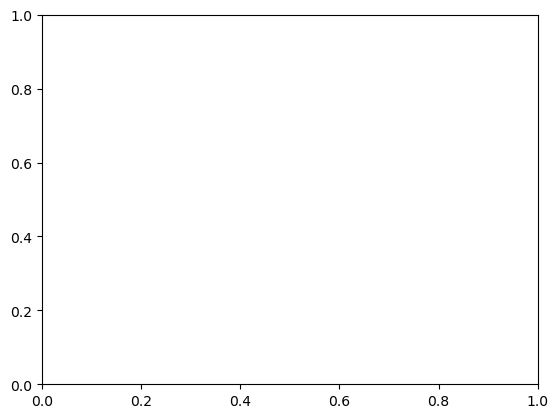

In [28]:
# box plot that shows the distribution of the tumor volume for each treatment group
regimen_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, box = plt.subplots()
ax1.set_ylabel("Mice Tumor Volume")
ax1.set_xlabel("Drug Regimen")
box.boxplot(tumor_volume, labels=regimen_labels)            
plt.show()


## Line and Scatter Plots

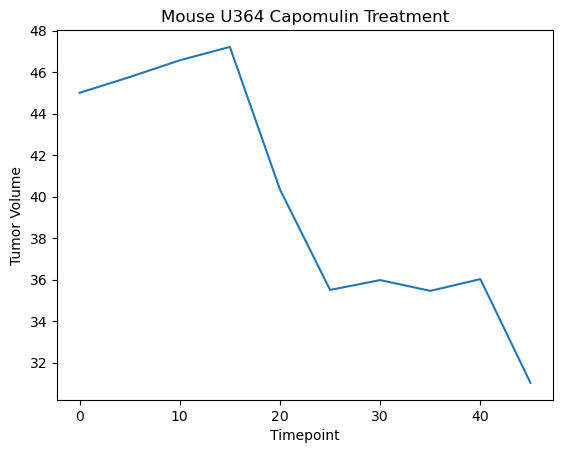

In [31]:
# line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = capomulin_data.loc[capomulin_data["Mouse ID"] == "u364",:]
tumor_data = line_plot["Tumor Volume (mm3)"]
timepoint_data = line_plot["Timepoint"]
plt.plot(timepoint_data, tumor_data)
plt.title('Mouse U364 Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

C:\Users\marie\AppData\Local\Temp\ipykernel_17236\3922861918.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data = capomulin_data.groupby(["Mouse ID"]).mean()


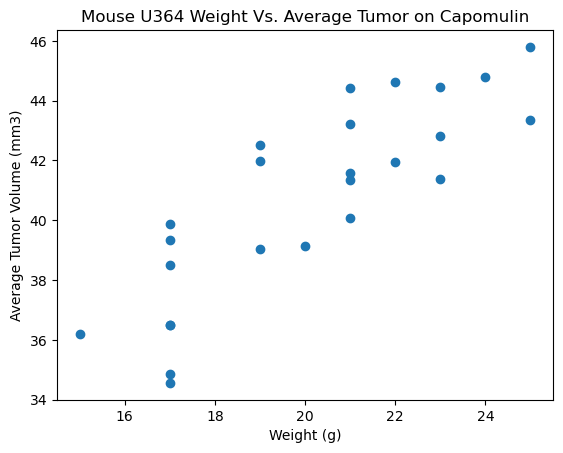

In [32]:
# scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_data = capomulin_data.groupby(["Mouse ID"]).mean()
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
plt.title('Mouse U364 Weight Vs. Average Tumor on Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

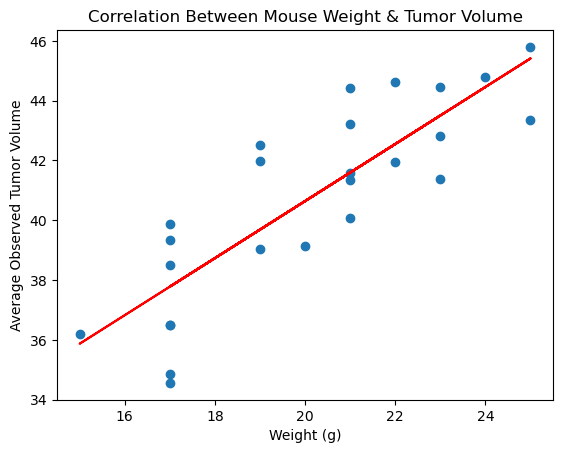

In [34]:
# calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capolumin regimen
correlation_weight = average_data['Weight (g)']
correlation_volume = average_data['Tumor Volume (mm3)']
plt.scatter(correlation_weight, correlation_volume)
plt.title('Correlation Between Mouse Weight & Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Observed Tumor Volume')

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(correlation_weight, correlation_volume)
line_regress = correlation_weight * slope + intercept
line_eq = "y="+str(round(slope,2))+"x +"+str(round(intercept,2))

plt.plot(correlation_weight, line_regress, "r-")
plt.annotate(line_eq, (5.8,0.8), fontsize=13, color="red")
plt.show()